# Linear Regression : A comprehensive guide

Linear regression is one of the most fundamental techniques of machine learning. It tries to find the relationship between the output often termed as $y$ and the input features often termed as $X$. Using linear regression we try to predict quantitative outputs. Here we will try to understand linear regression in depth (from a union of math and code point of view) and build intuition for this simple but effective model. This guide assumes that you do have some knowledge about Python, numpy, matplotlib, linear regression (high level conceptually) and wish to explore how to we take a concept from math/equations to code. However please note that trivial details like vectors, scalar multiplications etc... are not explained and its assumed that the reader is already familiar with those.

## Review of Math Concepts

Lets start by reviewing some basics of mathematics which will help us understand linear regression.

### Straight line

A straight line is denoted by equation $y = mx + b$ 
> where $m$ = slope of the line  
> $b$ is the y intercept

We can find the equation/draw the line if we have a mininum of 2 points i.e. $(x_1, y_1)$ and $(x_2, y_2) $ 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

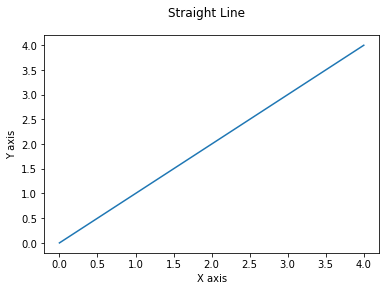

In [26]:
# Lets create few points for us to plot a straight line.

x = np.array([0,1,2,3,4])
y = np.array([0,1,2,3,4])

plt.suptitle('Straight Line')
plt.ylabel("Y axis")
plt.xlabel("X axis")

plt.plot(x, y)

where `slope of line` is equal to $ m = \frac{y_2 - y_1}{x_2 - x_1}$

The slope of the line can be : -
- Less than 0 (The line is opposite to the direction of the above example)
- Zero (The line parallel to x axis)
- More than 0 (The line is in the direction of the above example)

### Derivative

A little bit of calculus before we start digging into linear regression. A derivative of a function is the sensitivity to change of the function's output value with respect to the input values. We calculate derivative value (at a given position) by calculating the slope of the tangent at that point.

Lets see an example below...

In [27]:
# Function
def polynomial_order_2(x):
    return x**2

# Calculates the derivative of any function
def der(func, point):
    h = .0000001
    return (func(point + h) - func(point))/h

# Lets create our x and y co-ordinates
x = np.linspace(-10, 10, 100)
y = polynomial_order_2(x)

# We choose to create a tangent at 80th index.
m = der(polynomial_order_2, x[80])  # Slope at the point.
c = y[80] - m*x[80]  # Calculate the y intercept

# Points for our tangent, we choose x as 0 and 10
x1 = 0
y1 = m*x1 + c

x2 = 10
y2 = m*x2 + c

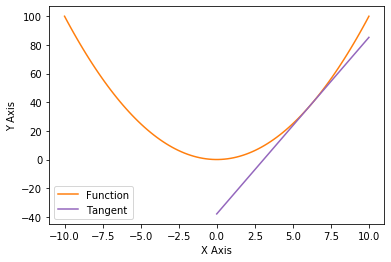

In [28]:
# Plotting our graph

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.plot(x, y, 'C1', label='Function')
plt.plot([x1,x2], [y1,y2], 'C4', label = 'Tangent')
plt.legend()

## The problem

Lets try and understand what problem are we trying to solve using linear regression.

We have a waiter who wishes to predict his tip based on the dishes he has serverd to his customer, based on the orders and tips which he has served and received in the past. Lets check out our simple dataset below. In this example we will be concentrating on total_bill and tip. Where total_bill will be the input and tip should be predicted by the model based on the historical data.

__Data Sample__

A quick sneak peak at our data.

In [29]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## Overview of Linear Regression

Linear Regression as the name suggests tries to fit a linear model (straight line, plane, hyperplane i.e. non quadratic) to our data and predicts _continuous output_. Continuous output means that its not from a set of predefined values e.g. animals set $\{cat, dog, frog\}$ however is something like a continuous output e.g. temperature, dollar value etc...

For now lets concentrate on simple linear regression and leave multiple linear regression for later.

__Simple Linear Regression vs Multiple Linear Regression__

- Simple Linear Regression - a single independent variable is used to predict the value of a dependent variable.
- Multiple Linear Regression - two or more independent variables are used to predict the value of a dependent variable.


__Univaraite Regression vs Multivariate regression__

- Univaraite Regression - Predict 1 dependent variable.
- Multivariate regression - Predict more than 1 dependent variable.

__Example__

We will use the same data (for now we just care about the total_bill as the 1 and only feature or input) for our example. The goal of linear regression will be to find the best straight line (best fit) which fits the tip and total bill amount (x and y).

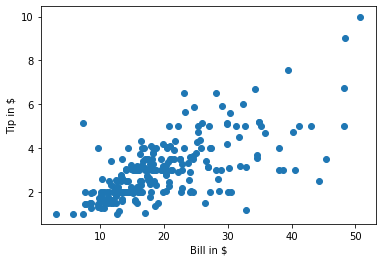

In [30]:
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Bill in $')
plt.ylabel('Tip in $')
plt.show()

The features need not be restricted to just 1 dimention, we can have n dimention features (which act as inputs) to our model which predict the tip. e.g. smoker, day, sex, size etc.. as our data frame shows above.

### Math Behind Linear Regression

Lets understand the math behind linear regression.

The equation of straight line is $y = mx + b$, we can however generalizes this to $n$ dimension as $y = b + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$. Using linear equation what we wish to calculate are the values of all $\theta$ parameters which will then make up the equation of line/hyperplane for predicting the values of future inputs.

Rewrite the above equation as $y = b x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$ where $x_0 = 1$ ($x_0$ has been added to simplify notation and equation for linear algebra)

__Linear Algebra__

Its computationally efficient to compute matrices on a computer rather than for loops (in certain scenarios), thus we try and represent our equations in linear algebra terms to increase the performance of our system.

Using linear algebra we can re-write the above equation in matrix format as $ \theta^\intercal X$ where $X$ is a matrix of our features and data points and $\theta$ is our parameter vector (which we wish to calculate/optimize) and $y$ is our output vector which we have as output/correct values of our  data points (e.g. tips).


#### Cost Function

__Error__

For each training data our program will calculate the output value and we will compare that output value to the correct value which we were given. The difference between these 2 values which we call error. 

$$h(x) - f(x)$$
where
> h(x) - what our hypothesis predicted the value of x. (e.g. What tip the waiter should have received)  
> f(x) - what was the actual/true output value. (e.g. What tip the waiter did receive) 

For our hypothesis to be as accurate as possible the above error should be as low/minimum as possible. In other words we wish to minimize our average/mean error for our training set. We will now square our error so that the summation does not cancel the positive and negative terms and we end up with our cost function as below. 

__Approach 1 : Gradient Descent__

This approach is known gradient descent and the computer loops over multiple times until it finds the best paramters or linear regression converges.

$$ \mathrm{Cost Function / In Sample Error = }\sum_{1}^{N} \frac{1}{N} (h(x_n) - f(x_n))^2   $$

__Approach 2 : Normal Equation__

Or writing this in linear algebra terms as shown below. (This results in normal equation). In this approach we do not have to loop again and again but the normal equation calculates the best possible values of parameters in 1 shot.

$$ \mathrm{Cost Function / In Sample Error = } \sum_{1}^{N}  \frac{1}{N} (\theta^\intercal x_n - y_n)^2 $$

If you have not guessed by now the above 2 equations above tell us the 2 different ways of optimizing the cost function. 

- Approach 1 - Gradient Descent. Loops over to find the best parameters.
- Approach 2 - Normal equation. Calculates the $\theta$ parameters in 1 shot.

Both the approaches have their pros and cons which we will discuss later. However these are not the only 2 optimization approaches but there are loads more, which we will not cover in this article.

#### The Optimization Step

How would you know that you have the best $\theta$ parameters ? If we have the best parameters the cost function will be minimized. Remember that the cost is an error or difference in our prediction vs the actual output. The goal is to minimize this cost i.e. minimize the cost function.

Thus lets take the derivative of these cost function and set it to 0. I wont go through the derivation/proof but list the final result. (There are different links/books/lectures avaiable which will go through the proof of how we arrive at these final equations)

__Gradient Descent__

Repeat until convergence for all theta simultaneously

$$ \theta :=  \theta - \alpha \frac{1} {N} \sum_{1}^{N} (h(x_n) - f(x_n))  $$

> where $\alpha$ is the learning rate.

__Normal Equation__

$$ \theta = (X^\intercal X)^{-1} X^\intercal Y$$

So this is pretty much like 1 step learning, but as long as it learns we do not care :).

_Non Invertability_ : Some of you who are familiar with linear algebra may pose a question as to what happens if the matrix is non intvertable. It is plaussible but unlikely that you will face this issue in real life, however there are ways to deal with that as well.

#### Gradient Descent vs Normal Equation

So which optimization technique should we use. (These are not the only 2 approaches, there are others too... ) Listed below are few of the key characteristics of each.

__Gradient Descent__

- This is an iterative process of finding the best coefficients.
- Gradient descent scales well for large data sets with many features. (In general I am talking about $10^4$ or more features)

__Normal Equation__

- You will get the optimum value of coefficients in single shot. No iteration.
- In certain cases where we have large data set and many features the computation can be very expensive. (i.e. transposing and inverting the matrix) 

## Code

Lets start coding our linear regression from scratch. (We will not use scikitlearn to call an API for linear regression which defeats the purpose of learning and understanding, even though that might be the most efficient and convinient way to do so). However we will use pandas and numpy.

### Normal Equation (From Scratch)

While Sklearn and other libraries provide methods/api for linear regression in single shot it is useful to understand and code from scratch as to how these work. There may be scenraios where the standard API may not fit your need thus you may have to tweek the algorithm or cost function etc... thus while standard library is usable and highly optimized there are cases where coding these from scratch will be useful.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset
df = sns.load_dataset('tips')
df['bias'] = np.ones(len(df))


# Split out data into test and train
msk = np.random.rand(len(df))
train = df[msk < .8]
test = df[msk >= .8 ]

For now lets only worry about the bill i.e. we deal with simple (1D) linear regression.

In [32]:
# Now we have our X and Y 
x_train = train[['bias', 'total_bill']]
y_train = train['tip']

In [33]:
coef = np.linalg.inv(np.transpose(x_train).dot(x_train)).dot(np.transpose(x_train)).dot(y_train)
coef

array([1.08302278, 0.09712166])

So as you see above we have our parameters calculated by using the normal equation method. We can use the above parameters and plug them into $y = mx + b$ to form a straight line. Plotting our straight line below ... 

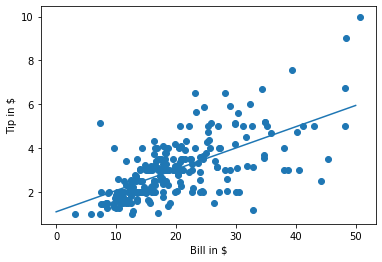

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Bill in $')
plt.ylabel('Tip in $')
plt.plot(np.linspace(0,50,10), np.linspace(0,50,10)*coef[1] + coef[0])
plt.show()

### Sklearn

While its fun and an awesome learning experience to code our model from scratch, it would be benefitial to use existing libraries such as scikitlearn which has such functions built in. So lets use sklearn to check our coeffients (including intercept which sklearn provides using `regr.intercept_`)

In [35]:
# Sklearn 

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
regr.intercept_, regr.coef_[1]

(1.0830227811143252, 0.09712166234205563)

As you see above that sklearn validates our coef which we got when we coded the algorithm from scratch.

Lets now use our test data to check the accuracy of our model.

In [36]:
x_test = test[['bias', 'total_bill']]
y_test = test['tip']

y_pred = regr.predict(x_test)

#### Model evaluation metrics for regression

In [44]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred, squared=False)) # RMSE
print(metrics.mean_squared_error(y_test, y_pred, squared=True)) # MSE

0.7178954915050831
0.9486831762506096
0.8999997689009452


In [38]:
y_test

10     1.71
11     5.00
16     1.67
17     3.71
23     7.58
       ... 
234    3.00
237    1.17
241    2.00
242    1.75
243    3.00
Name: tip, Length: 61, dtype: float64

## Regularization

## Feature Scaling

## Interpretability

The more restricitve the model the easier it is to interpret which means it is easier for inference.

$$ X^\intercal X \theta = X^\intercal Y$$


_Example_ : This example shows how would you convert our initial 2 rows of data frame into linear algebra equation.


$$\begin{bmatrix}
\theta_{bias} & \theta_{bill} & \theta_{sex} & \theta_{smoker} & \theta_{day} & \theta_{time} &  \theta_{size}\end{bmatrix}  
\begin{bmatrix}
1 & 1 \\
16.99 & 10.34 \\ 
Female & Male \\ 
No & No \\
Sun & Sun \\
Dinner & Dinner \\
2 & 3\\ \end{bmatrix}
= 
\begin{bmatrix} 
\\ 1.01 \\ 1.66
\end{bmatrix}$$